In [67]:
import pandas as pd
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Minimum Spend Levels for Stat Sig Difference in Response Rates

**GOAL**: Calculate the minimum spend such that we are confident rr_genre1 > rr_genre2

Spend -> Impressions -> Lift -> Response Rates

Assumptions:
1. Impressions are delivered in a specific way -> we don't control this and use historical data to approximate this
2. Response rates -> we don't know this, but we can make some assumptions given historical data on linear TV

In [45]:
def get_beta_params(impressions, rr):
    a = (impressions * rr)
    b = impressions - a
    return a, b

In [64]:
days = 21

# Impressions
action = norm(1000, 100).rvs(days)
comedy = norm(5000, 257).rvs(days)
horror = norm(200, 10).rvs(days)
sports = norm(10000, 567).rvs(days)

# True Response rates
action_rr = 0.015
comedy_rr = 0.020
horror_rr = 0.022
sports_rr = 0.017

# Daily lift and non-responders that we observe
action_rr_params = get_beta_params(action, action_rr)
comedy_rr_params = get_beta_params(comedy, comedy_rr)
horror_rr_params = get_beta_params(horror, horror_rr)
sports_rr_params = get_beta_params(sports, sports_rr)

# Daily response rates
action_rrs = beta(*action_rr_params).rvs(days)
comedy_rrs = beta(*comedy_rr_params).rvs(days)
horror_rrs = beta(*horror_rr_params).rvs(days)
sports_rrs = beta(*sports_rr_params).rvs(days)

# How does response rate distribution change overtime?

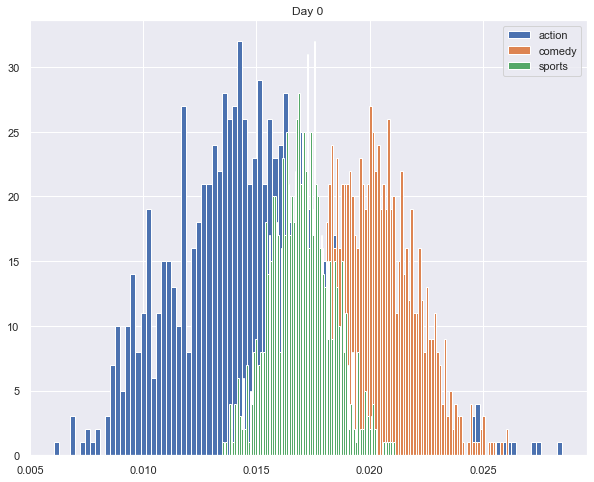

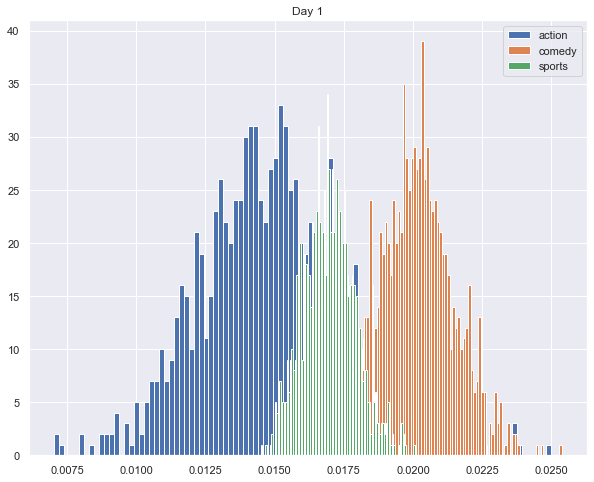

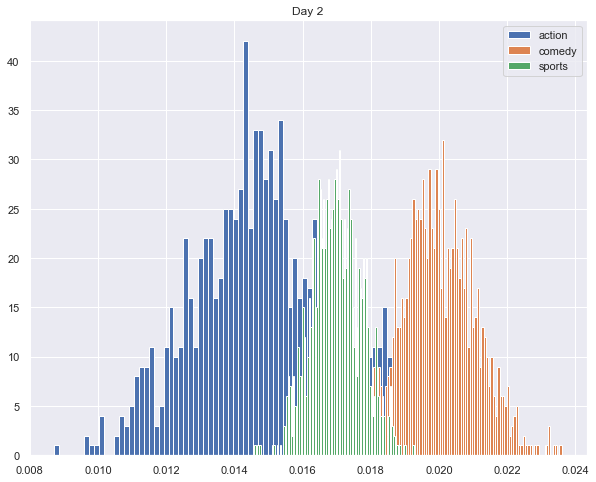

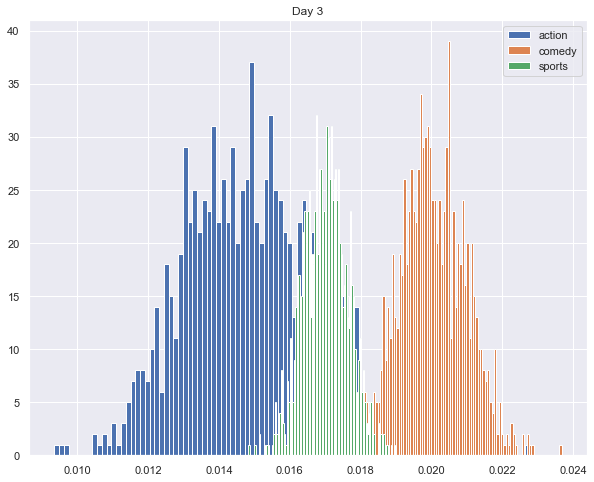

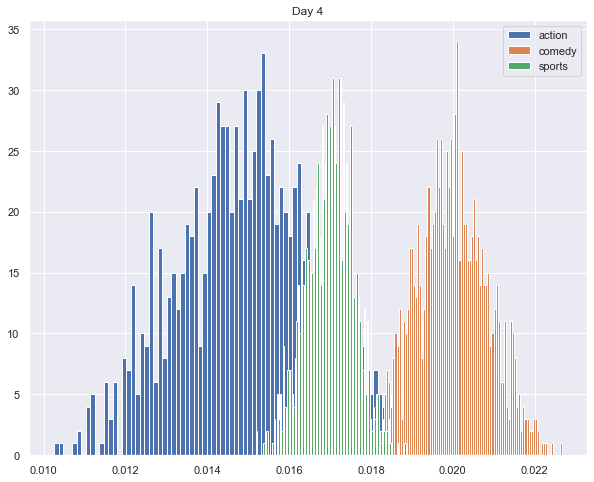

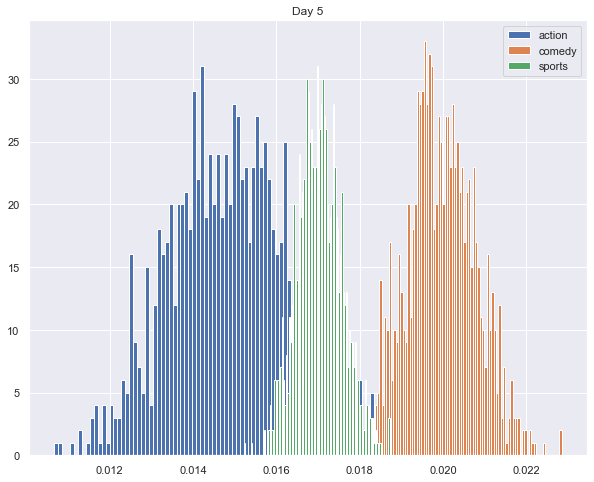

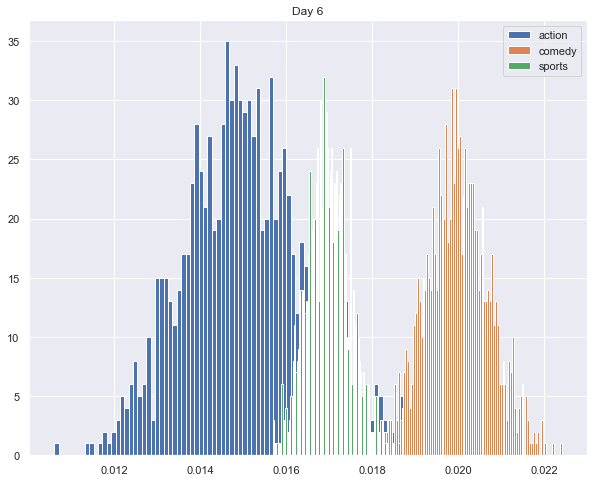

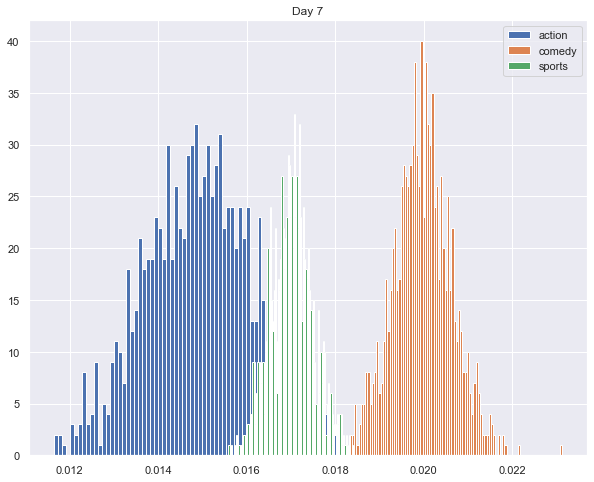

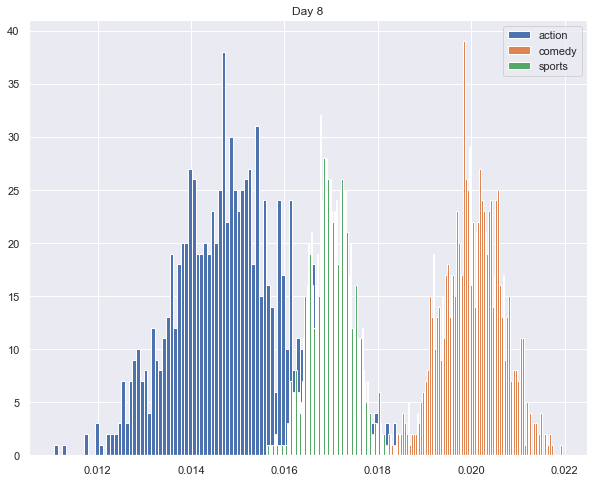

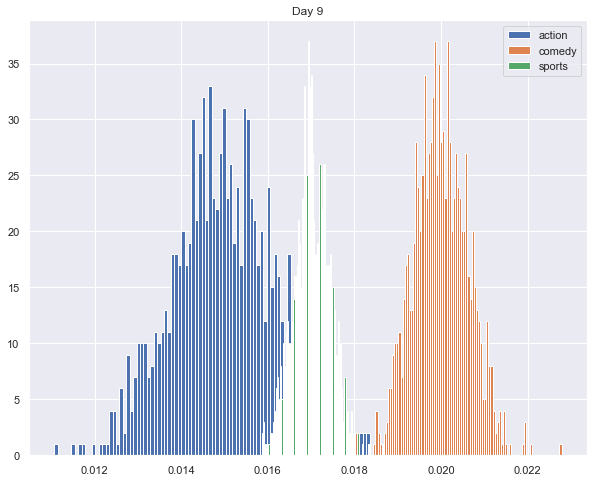

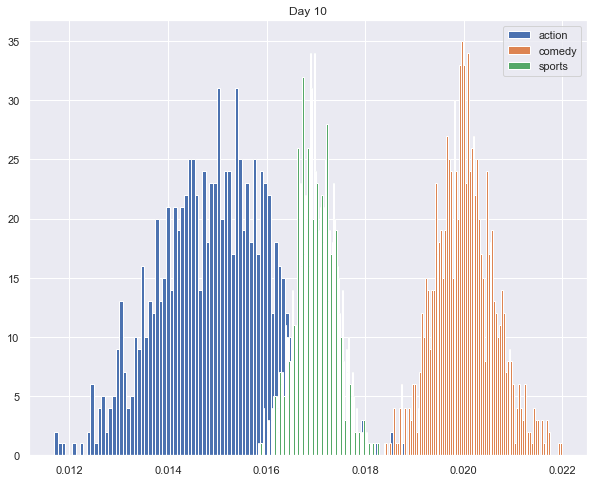

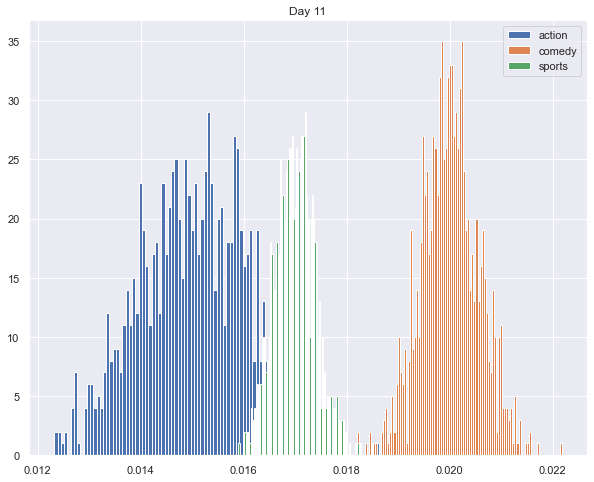

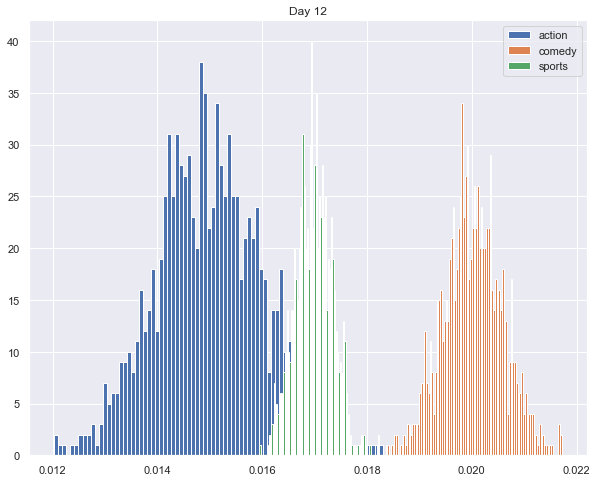

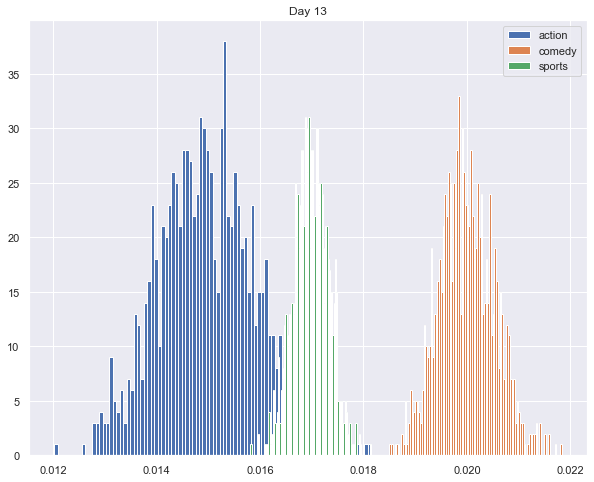

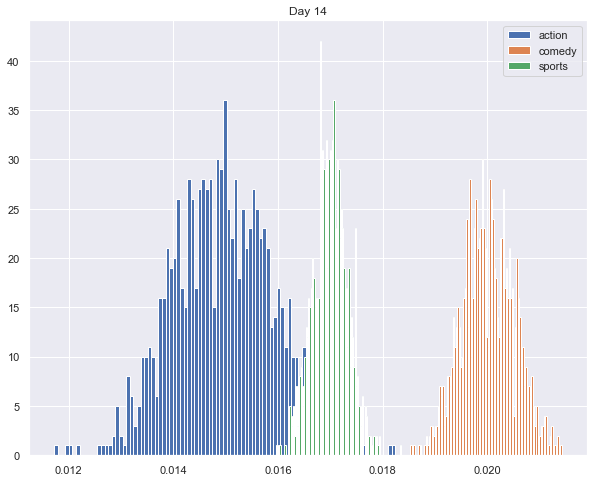

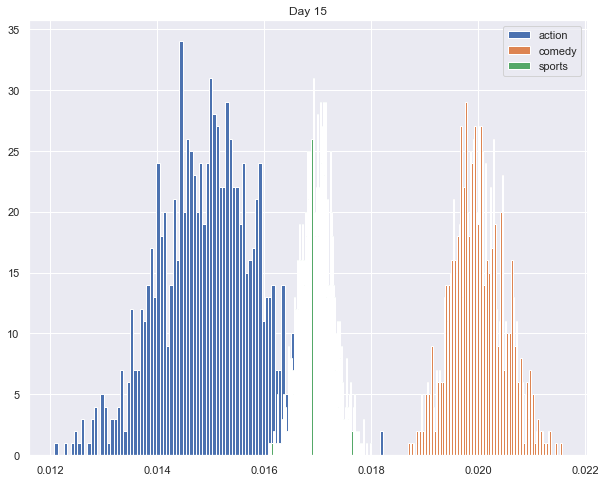

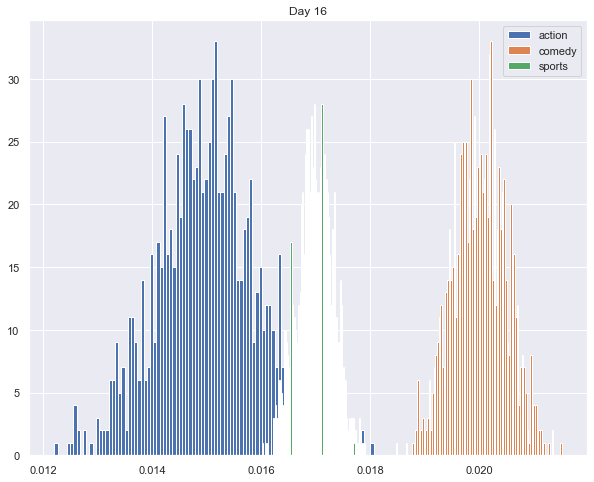

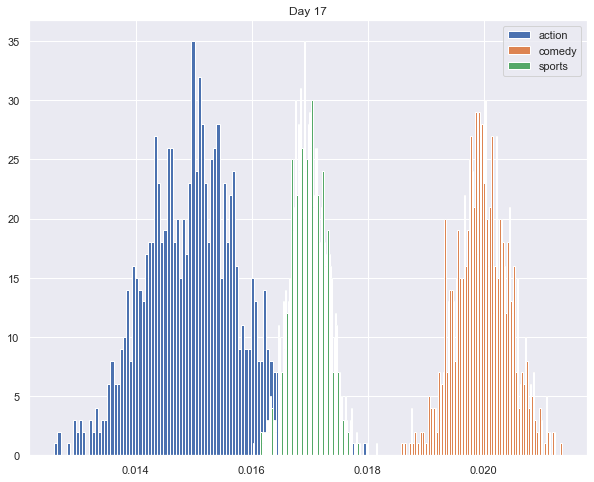

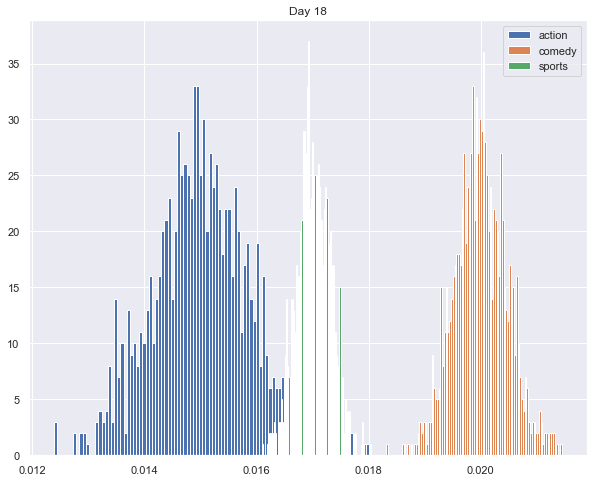

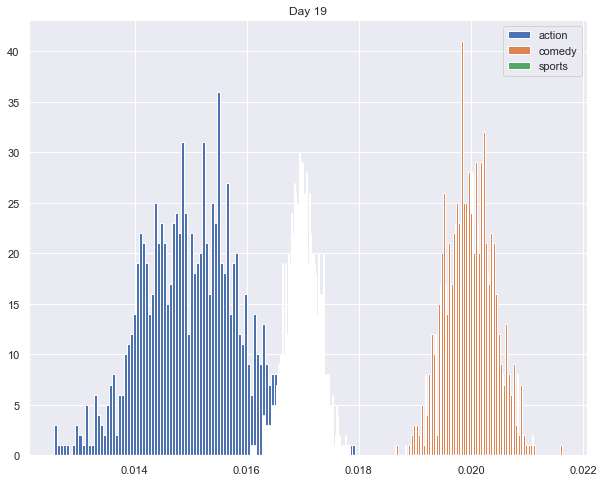

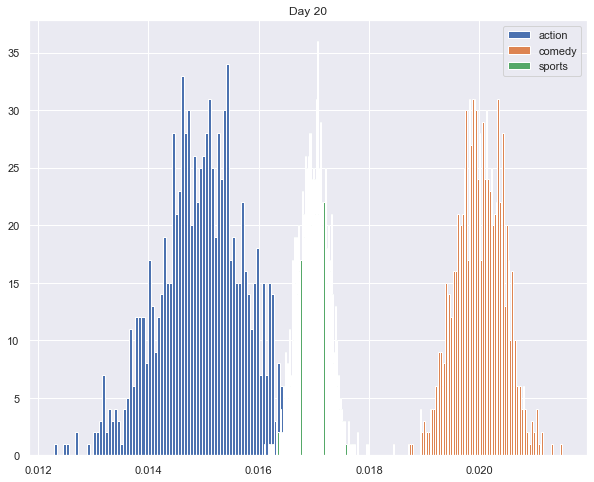

In [80]:
beta_params = {
    'action': action_rr_params,
    'comedy': comedy_rr_params,
    # 'horror': horror_rr_params,
    'sports': sports_rr_params,
}

a_rolling = {
    'action': 0,
    'comedy': 0,
    # 'horror': 0,
    'sports': 0,
}
b_rolling = {
    'action': 0,
    'comedy': 0,
    # 'horror': 0,
    'sports': 0,
}

for day in range(days):
    plt.figure(figsize=(10,8))
    for key, params in beta_params.items():
        # Continuously add lift and total impressions day over day
        a_rolling[key] += beta_params[key][0][day]
        b_rolling[key] += beta_params[key][1][day]

        # Draw samples to build out hypothetical distribution
        rr = beta.rvs(a_rolling[key], b_rolling[key], size=1000)
    
        # Plot distribution
        plt.hist(rr, bins=100, label=key)
        plt.title(f'Day {day}')
    plt.legend()
    plt.show()